# Selection Sort
Selection sort is an algorithm that sorts elements of an array. The algorithm divides the input into two parts: a subarray of sorted items, and a subarray of items still needing to be sorted. In each iteration, the function finds the smallest element from the unsorted part and swaps this element with the leftmost unsorted element. Then, the subarray boundary is moved one element to the right and the process repeats itself until the list is sorted in ascending order. Selection sort is simple; in some scenarios, it outperforms more complicated algorithms. For example, selection sort is very fast at sorting arrays with small lengths (like 20 items). <br>
Facts about selection sort:
* comparison sorting algorithm: compares elements of an array
* not a stable sorting algorithm: does not preserve relative order of equivalent elements
* in-place sorting algorithm: has space complexity O(1), meaning it is memory efficient and sorted array is made locally
* not an adaptive algorithm: the run time is not affected when given a partially sorted array
* deterministic algorithm: when given a certain input, sane sequence of steps and result occurs

In [1]:
# global imports
from time import time
import matplotlib.pyplot as plt
from pandas import DataFrame
import statsmodels.formula.api as sm
import numpy as np

## Selection Sort Function
Steps to implement selection sort function:
1. write the function for selection sort
 - create a for loop that iterates through the entire array
 - create a variable index. This variable will hold the index of the smallest unsorted element. To initialize it, set index equal to i (the index of the first unsorted item in the array) 
 - create a nested for loop that iterates through the unsorted elements of the array: from i+1 to the end of the array
 - if the jth element is less than the indexed element, set index equal to j
 - after iterating through all of the insorted elements, index is equal to the smallest unsorted element
 - if the index of the smallest unsorted element is not i (the index of the first unsorted element in the array), swap these elements using the swap function
 - repeat this process for the next iteration of the outer for loop
 - return the sorted array
2. write the function for swapping values
 - create a temporary variable to hold i (the larger value)
 - set the array at index i equal to the value of j (the smaller value)
 - set the array at index j equal to the value of i (the larger value)

In [2]:
# selection sort function
def selectionSort(arr):
    '''sorts an array of integers from smallest to largest'''
    for i in range(0, len(arr)-1):
        index = i
        for j in range(i+1, len(arr), 1):
            if arr[j] < arr[index]:
                index = j
        if index != i:
            swap(arr, index, i)
    return arr
            
# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Timing Function
To obtain observed values for the runtime of the algorithm, I wrote a function that times how long it takes for the program to selection sort an array. Steps to implement the timing function:
1. initialize a variable t that will hold the runtime
2. set t0 equal to the current time (before sorting)
3. sort the array with selection sort
4. set t1 to the current time (after sorting)
5. set t equal to the difference between t1 and t0, which is the run time for sorting the array
6. return the run time

In [3]:
# time the sort
def timeOneSelect(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = selectionSort(arr)
    t1 = time()
    t = t1 - t0
    return t

## Sort Sample Arrays and Find Run Time
1. import arrrays of different lengths. These arrays are created in the arrays program. The arrays are used for each sorting algorithm, allowing for direct comparison of algorithms.
2. use timeOneSelect() function to find the run time of sorting each array

In [4]:
# import arrays from array program
%store -r arr1
%store -r arr2
%store -r arr3
%store -r arr4
%store -r arr5
%store -r arr6
%store -r arr7
%store -r arr8

# time how long it takes to sort each array
time1 = timeOneSelect(arr1)
time2 = timeOneSelect(arr2)
time3 = timeOneSelect(arr3)
time4 = timeOneSelect(arr4)
time5 = timeOneSelect(arr5)
time6 = timeOneSelect(arr6)
time7 = timeOneSelect(arr7)
time8 = timeOneSelect(arr8)

# create an array of times
times = [time1, time2, time3, time4, time5, time6, time7, time8]

## Theoretical Run Time With Big O

### Time Complexity of Selection Sort Function
Observe the selection sort function(see above). 
1. the outer for loop executes n times
 - it iterates n-1 times and checks an additional time to see that the next value of i is not in the range
2. statements inside the outer for loop execute n-1 times
3. for the worst case scenario, the inner for loop executes n + (n-1) + ... + 1 times
 - by arithmatic sequences properties, this is equivalent to n(n+1)/2. Expanding, we get (1/2)(n^2 + n)
 - it runs through the inner for loop (n-1) + ... + 1 times and checks an additional time to see that the next value of j is not in the range
4. statements inside the inner for loop execute (n-1) + (n-2) + ... + 1 times
 - by arithmatic sequences properties, this is equivalent to n(n-1)/2. Expanding, we get (1/2)(n^2 - n)
5. all other statements execute 1 time
6. sum the times for all statements to get T = an^2 + bn + c
7. the fastest growing term is an^2, so n^2 goes in the O() expression <br>

The time complexity for selection sort is O(n^2)

### Theoretical Time Complexity Using O(n^2)
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n, and n^2, where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use polynomial regression to get the equation Y = a + bn + cn^2
 - a, b, and c are the ordinary least squares estimated coefficients
4. since selection sort is O(n^2), theoretical run times are T = a + bn + cn^2
 - use the coefficients found in polynomial linear regression
 - n represents the length of the array

In [5]:
# array of ones
ones = [1, 1, 1, 1, 1, 1, 1, 1]

# array of lengths
length = [3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

# create an array of the squared lengths
squaredLengths = []
for i in range(0, 8):
    val = length[i] ** 2
    squaredLengths.append(val)

# create a dataframe
Data = {'ones': ones, 'length': length, 'squaredLengths': squaredLengths, 'times': times}
df = DataFrame(Data, columns=['ones', 'length', 'squaredLengths', 'times'])
# matrix of predictors
X = df[['ones', 'length', 'squaredLengths']]
# vector of responses
Y = df['times']

# fit polynomial regression
result = sm.OLS(Y, X).fit()

# theoretical coefficients
a = result.params[0]
b = result.params[1]
c = result.params[2]

### Ordinary Least Squares Estimated Coefficients
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals <br>
* the coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length

In [6]:
# variable holding confidence intervals
confInt = result.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = result.bse

# intercept
aDec = '{:10.9f}'.format(a)
intercept = ('The estimated intercept is {x}. If the size of an array is 0, on average,' 
                ' I expect the run time to be {y} seconds.').format(x = aDec, y = aDec)
print(intercept)
# intercept confidence interval
aLower = '{:10.9f}'.format(confInt[0][0])
aUpper = '{:10.9f}'.format(confInt[1][0])
intCI = ('I am 95% confident that the true average run time for an array of length 0 is between'
            ' {x} and {y} seconds.').format(x = aLower, y = aUpper)
print(intCI)
# intercept standard error
aStE = '{:10.9f}'.format(stE[0])
intStE = ('The standard error of the intercept is {x}.').format(x = aStE)
print(intStE)
print()

# coefficient for n
bDec = '{:10.9f}'.format(b)
coef1 = ('The estimated coefficient for the n term is is {x}. If the size of an array increases by 1 element, on ' 
         'average, I expect the run time to increase by {y} seconds.').format(x = bDec, y = bDec)
print(coef1)
# coefficient for n confidence interval
bLower = '{:10.9f}'.format(confInt[0][1])
bUpper = '{:10.9f}'.format(confInt[1][1])
coef1CI = ('I am 95% confident that the true expected change in run time for one unit increase in array size'
            ' is between {x} and {y} seconds.').format(x = bLower, y = bUpper)
print(coef1CI)
# coefficient for n standard error
bStE = '{:10.9f}'.format(stE[1])
coef1StE = ('The standard error of the coefficient for the n term is {x}.').format(x = bStE)
print(coef1StE)
print()

# coefficient for n^2
cDec = '{:10.9f}'.format(c)
coef2 = ('The estimated coefficient for the n^2 term is {x}. If the squared size of the array increases by 1 element,'
         ' on average, I expect the run time to increase by {y} seconds.').format(x = cDec, y = cDec)
print(coef2)
# coefficient for n^2 confidence interval
cLower = '{:10.9f}'.format(confInt[0][2])
cUpper = '{:10.9f}'.format(confInt[1][2])
coef2CI = ('I am 95% confident that the true expected change in run time for a one unit increase in the squared '
           ' array size is between {x} and {y} seconds.').format(x = cLower, y = cUpper)
print(coef2CI)
# coefficient for n^2 standard error
cStE = '{:10.9f}'.format(stE[2])
coef2StE = ('The standard error of the coefficient for the n^2 term is {x}.').format(x = cStE)
print(coef2StE)

The estimated intercept is 0.218129184. If the size of an array is 0, on average, I expect the run time to be 0.218129184 seconds.
I am 95% confident that the true average run time for an array of length 0 is between 0.070580250 and 0.365678117 seconds.
The standard error of the intercept is 0.057399041.

The estimated coefficient for the n term is is -0.000052702. If the size of an array increases by 1 element, on average, I expect the run time to increase by -0.000052702 seconds.
I am 95% confident that the true expected change in run time for one unit increase in array size is between -0.000092413 and -0.000012992 seconds.
The standard error of the coefficient for the n term is 0.000015448.

The estimated coefficient for the n^2 term is 0.000000059. If the squared size of the array increases by 1 element, on average, I expect the run time to increase by 0.000000059 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in the squared  array siz

## Compare Theoretical and Observed Run Time
I created a scatterplot of the observed run times and the theoretical run times for sorting arrays of different lengths.
* observed run times are plotted in blue, theoretical trend line is drawn in red
* observed values are very close to the theoretical trend line, meaning the theoretical run time of O(n^2) is a good estimate for this data
* discrepancies between observed and theoretical run time can be attributed to experimental error
* since selection sort is O(n^2), there is a quadratic relationship between array size and run time

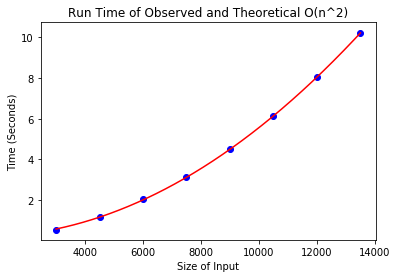

In [7]:
# regression line equation
x = np.linspace(3000, 13500, 10500)
line = a + b * x + c * x**2

# scatterplot of observed and theoretical O(n^2) values
plt.scatter(length, times, c = 'b')  # plot observed values in blue
plt.plot(x, line, c = 'r')  # plot regression line equation in red
plt.xlabel('Size of Input')
plt.ylabel('Time (Seconds)')
plt.title('Run Time of Observed and Theoretical O(n^2)')
plt.show()

### Mean Squared Error
- mean squared error measures the squared distance between observed and theoretical values. A small mean squared error indicates observed and theoretical run times are similar
- selection sort obtains an MSE that is close to 0, meaning the theoretical run times are a good estimate
- this means selection sort has a run time of O(n^2)

In [9]:
# output the MSE
MSE = '{:10.9f}'.format(result.mse_resid)
MSE

'0.000721644'

## Conclusion
 - the theoretical run time of selection sort is O(n^2)
 - data obtained from sorting sample arrays supports this conclusion
    - on the scatterplot, observed values are close to theoretical values
    - the mean squared error is close to 0